In [1]:
%load_ext autoreload
%autoreload 2
# Enable imports form top-level of project (edit top_level_path accordingly)
import os
import sys
import inspect

top_level_path = os.path.abspath(os.path.join('..'))
if top_level_path not in sys.path:
	sys.path.append(top_level_path)

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from longestpath.gen import gen_num_edges, gen_num_edges_undirected, gen_planted_hamiltonian_undirected_fixed_degree
from benchmarking import RandomParams, Benchmark, new_random_benchmark, Solver, new_graph_file_benchmark, new_benchmark
import re

In [3]:
def generate():
  return [
    gen_planted_hamiltonian_undirected_fixed_degree(30, round(30 * deg / 2))
    for deg in np.linspace(1.0, 10.0, 10) for _ in range(50)
  ]

params_code = inspect.getsource(generate)
graphs = generate()

benchmark = new_benchmark(graphs, solvers=[
	Solver("brute", "FAST_BOUND"),
	Solver("brute", "BRUTE_FORCE"),
	Solver("brute", "BRANCH_N_BOUND"),
	# Solver("brute", "BRUTE_FORCE_COMPLETE"),
	Solver("ilp"),
	Solver("kalp", threads=4),
	# Solver("kalp"),
], params_code = params_code, override_benchmark_path="../final_benchmarks/only_ham_3brute_ilp_kalp_deg1-10_50runs")

benchmark.benchmark_path


'../final_benchmarks/only_ham_3brute_ilp_kalp_deg1-10_50runs'

In [158]:
np.linspace(10, 30, 10)

array([10.        , 12.22222222, 14.44444444, 16.66666667, 18.88888889,
       21.11111111, 23.33333333, 25.55555556, 27.77777778, 30.        ])

In [2]:
benchmark = Benchmark.load("../final_benchmarks/only_ham_3brute_ilp_kalp_deg1-10_50runs/")

In [4]:
benchmark.run(retryFailures=True, timeout=3 * 60)


graph: 0.txt, solver: brute('FAST_BOUND') ... ✅
length: 29, run_time: 1.1e-05
graph: 1.txt, solver: brute('FAST_BOUND') ... ✅
length: 29, run_time: 2e-05
graph: 2.txt, solver: brute('FAST_BOUND') ... ✅
length: 29, run_time: 1.3e-05
graph: 3.txt, solver: brute('FAST_BOUND') ... 

✅
length: 29, run_time: 1.2e-05
graph: 4.txt, solver: brute('FAST_BOUND') ... ✅
length: 29, run_time: 1.2e-05
graph: 5.txt, solver: brute('FAST_BOUND') ... ✅
length: 29, run_time: 1.2e-05
graph: 6.txt, solver: brute('FAST_BOUND') ... ✅
length: 29, run_time: 1.2e-05
graph: 7.txt, solver: brute('FAST_BOUND') ... ✅
length: 29, run_time: 1.3e-05
graph: 8.txt, solver: brute('FAST_BOUND') ... ✅
length: 29, run_time: 1.1e-05
graph: 9.txt, solver: brute('FAST_BOUND') ... ✅
length: 29, run_time: 1.2e-05
graph: 10.txt, solver: brute('FAST_BOUND') ... ✅
length: 29, run_time: 1.1e-05
graph: 11.txt, solver: brute('FAST_BOUND') ... ✅
length: 29, run_time: 2.8e-05
graph: 12.txt, solver: brute('FAST_BOUND') ... ✅
length: 29, run_time: 1.3e-05
graph: 13.txt, solver: brute('FAST_BOUND') ... ✅
length: 29, run_time: 1.2e-05
graph: 14.txt, solver: brute('FAST_BOUND') ... ✅
length: 29, run_time: 1.2e-05
graph: 15.txt, solver: brute('FAST_BOUND') ... ✅
length: 29, run_time: 1.2e-05
graph: 16.txt, solver: bru

In [3]:
df_ = benchmark.get_dataframe()
if not "failure" in df_:
    df_["failure"] = None
df = df_
df.head()

,path,run_time,length,solver,graph_id,status,objective_value,failure,solver_name,vertices,edges,average_out_degree
0,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0.000011,29.0,0,0,NaN,NaN,NaN,brute('FAST_BOUND'),30,58,1.933333
1,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0.000020,29.0,0,1,NaN,NaN,NaN,brute('FAST_BOUND'),30,58,1.933333
2,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0.000013,29.0,0,2,NaN,NaN,NaN,brute('FAST_BOUND'),30,58,1.933333
3,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0.000012,29.0,0,3,NaN,NaN,NaN,brute('FAST_BOUND'),30,58,1.933333
4,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0.000012,29.0,0,4,NaN,NaN,NaN,brute('FAST_BOUND'),30,58,1.933333


In [17]:
df[(df["solver_name"] == "ilp()") & (df["length"] != 29)]

,path,run_time,length,solver,graph_id,status,objective_value,failure,solver_name,vertices,edges,average_out_degree


run_time    Axes(0.125,0.11;0.775x0.77)
dtype: object

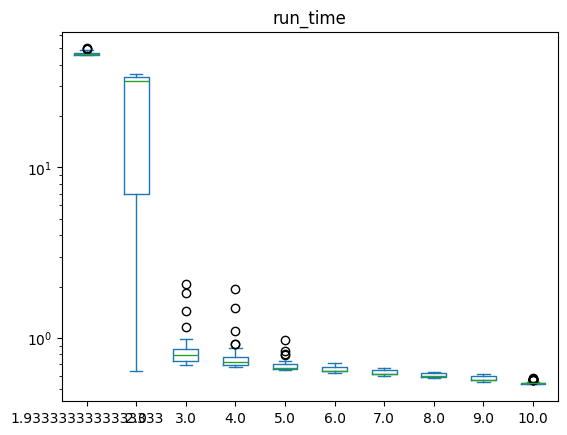

In [12]:
df[df["solver_name"] == "ilp()"][["run_time", "average_out_degree"]].plot.box(by="average_out_degree", logy=True)


In [5]:
df_grouped = df.groupby(['average_out_degree', 'solver', 'solver_name']).agg({"run_time": "mean", "failure": "any"}).reset_index()
df_grouped_failures_removed = df_grouped[df_grouped["failure"] == False]
to_plot = df_grouped_failures_removed.pivot(index='average_out_degree', columns='solver_name', values='run_time').rename(columns=lambda x: x + " (average)")

In [6]:
df_grouped_failures_removed.groupby(["solver_name"]).agg({"failure": "count"}).reset_index().rename(columns={"failure": "count"})

,solver_name,count
0,brute('BRANCH_N_BOUND'),10
1,brute('BRUTE_FORCE'),10
2,brute('FAST_BOUND'),10
3,ilp(),10
4,kalp(threads=4),4


In [7]:
df_grouped_failures_removed.head()

,average_out_degree,solver,solver_name,run_time,failure
0,1.933333,0,brute('FAST_BOUND'),0.000013,False
1,1.933333,1,brute('BRUTE_FORCE'),0.000002,False
2,1.933333,2,brute('BRANCH_N_BOUND'),0.000004,False
3,1.933333,3,ilp(),46.831174,False
4,1.933333,4,kalp(threads=4),1.925778,False


In [8]:
to_plot


solver_name,brute('BRANCH_N_BOUND') (average),brute('BRUTE_FORCE') (average),brute('FAST_BOUND') (average),ilp() (average),kalp(threads=4) (average)
average_out_degree,,,,,
1.933333,0.000004,0.000002,0.000013,46.831174,1.925778
2.000000,0.000007,0.000003,0.000015,22.522745,1.984495
3.000000,0.000838,0.000547,0.005441,0.853429,0.457396
4.000000,0.011184,0.034607,0.589332,0.783782,4.969584
5.000000,0.010062,0.083281,1.728413,0.687463,NaN
6.000000,0.040832,0.166812,0.025436,0.653658,NaN
7.000000,0.007485,0.035776,0.084233,0.625508,NaN
8.000000,0.000115,0.490761,0.000492,0.604577,NaN
9.000000,0.000087,0.000141,0.000066,0.575070,NaN


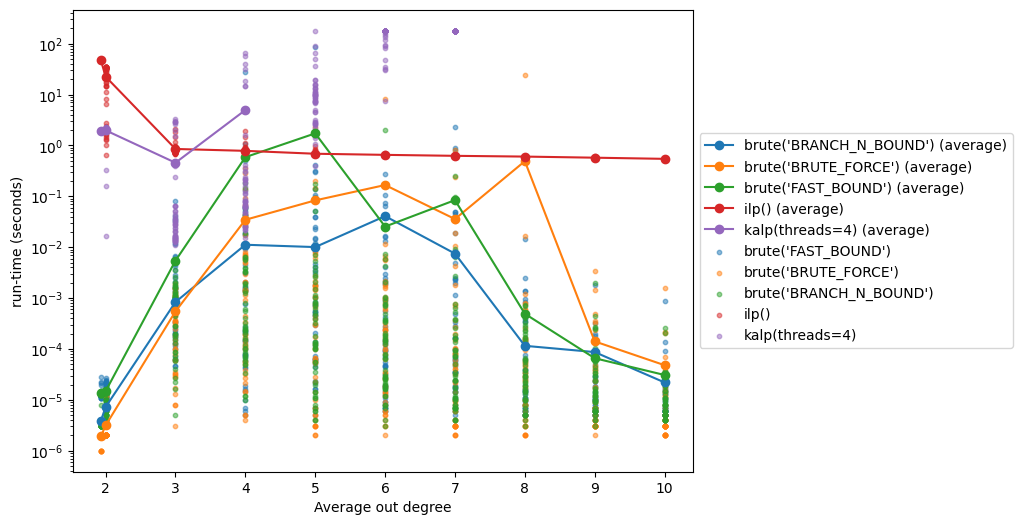

In [9]:
view = df[['average_out_degree', 'solver_name','length', 'run_time']]

# to_plot = df.groupby(['average_out_degree', 'solver', 'solver_name']).agg({'run_time': 'mean'}).reset_index() \
#     .pivot(index='average_out_degree', columns='solver_name', values='run_time') \
#     .rename(columns=lambda x: x + " (average)");

to_plot.plot(style="o-")

for solver_name in benchmark.solver_names():
    solver_df = df[df["solver_name"] == solver_name]  # Select rows where run-time is not null
    plt.scatter(solver_df['average_out_degree'], solver_df['run_time'], label=solver_name, alpha=0.5, s=10)

plt.yscale('log')
# plt.xticks(np.arange(1, 4.0, 0.5))
plt.ylabel("run-time (seconds)")
plt.xlabel("Average out degree")
# plt.title("Longest path solve-time for random directed graphs with 50 vertices")
# plt.axhline(y=0.015, color='black', linestyle='--', label='run-time cutoff', linewidth=1, alpha=0.5, zorder=0)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# df[df["solver"] == 0].plot(x = "average_degree", y="run_time", style="--bo", label="solver_name")
# df[df["solver"] == 1].plot(x = "average_degree", y="run_time", style="--bo", label="solver_name")
# plt.ylim(0, to_plot.max().max())
# plt.ylim(0, 0.001)

plt.gcf().set_size_inches(8, 6)
plt.savefig(os.path.join(benchmark.benchmark_path, "plot.png"), dpi=400, bbox_inches='tight')

In [10]:
to_plot2 = df.groupby("solver").get_group(0)[["run_time", "average_out_degree"]].sort_values(by="average_out_degree")
to_plot2


,run_time,average_out_degree
0,0.000016,1.0
27,0.000019,1.0
28,0.000010,1.0
29,0.000009,1.0
30,0.000009,1.0
...,...,...
519,0.000682,2.0
520,0.000099,2.0
521,0.000282,2.0
510,0.000178,2.0


<Axes: xlabel='average_out_degree'>

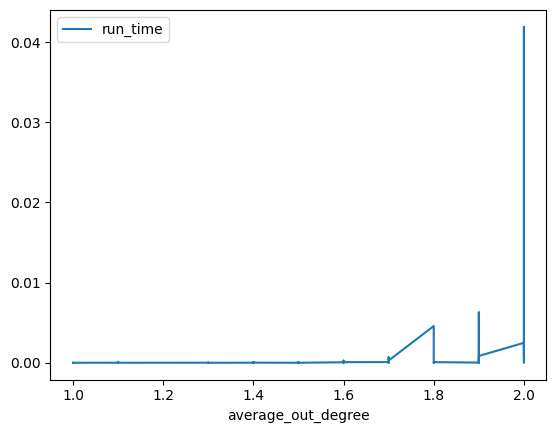

In [11]:
to_plot2.plot(x="average_out_degree", y="run_time")

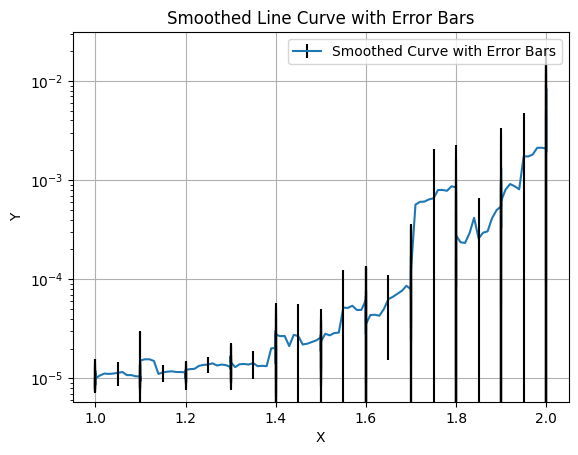

In [12]:
rolling_window = 10
df_smoothed = to_plot2.rolling(rolling_window, center=True).mean()
df_std = to_plot2.rolling(rolling_window, center=True).std()

# Plot the smoothed curve with error bars
plt.errorbar(df_smoothed['average_out_degree'], df_smoothed['run_time'], yerr=df_std['run_time'], label='Smoothed Curve with Error Bars', errorevery=5, barsabove=True, ecolor="black")
plt.xlabel('X')
plt.ylabel('Y')
plt.yscale("log")
plt.title('Smoothed Line Curve with Error Bars')
plt.legend()
plt.grid(True)
plt.show()